In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np

In [2]:
directory_path = f'../data/bot1/'

dataframes = []
column_titles = ["Bot #", "Pass Rate", "Num of Steps", "Seed", "Q Value"] 
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path, names=column_titles)
        dataframes.append(df)

temp = dataframes[2]
dataframes.pop(2)
dataframes.append(temp)

In [3]:
pass_rates = []
for df in dataframes:
    true_count = (df['Pass Rate'] == True).sum()
    pass_rates.append(true_count)
    print(true_count)
    

99
93
87
80
72
72
70
65
62
56
52


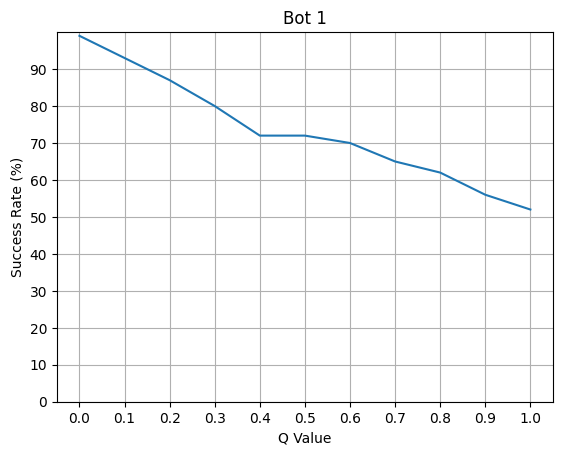

In [9]:
x = np.arange(0, 1.1, 0.1)         
plt.plot(x, pass_rates)
plt.xticks(x)
plt.yticks(np.arange(0, 100, 10)) 
plt.xlabel('Q Value')
plt.ylabel('Success Rate (%)')
plt.title('Bot 1')
plt.grid(True)  # Display grid lines
plt.ylim(0,100)
plt.savefig('bot1.png')